# Homework 4:  Linear models
This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 
​
You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

​
This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [ ]:
system("gdown --id 1ebJ2y4NuAcCD70-_v9DrIveuRN9qNr9G") 
HCP_data = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv") 

install.packages('broom')
library(tidyverse)
library(ggplot2)
library(broom)


head(HCP_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


In [ ]:
d1 <- HCP_data %>% 
                  select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
                  drop_na() %>%
                  mutate(Gender = ifelse(Gender == "F", 1, 0))
head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<int>,<int>
1,100206,0,130.42,543134,807245
2,100307,1,112.56,407292,664124
3,100408,0,121.18,500417,726206
4,100610,0,126.53,512946,762308
5,101006,1,101.85,429449,579632
6,101107,0,107.04,416995,665024


---
## Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

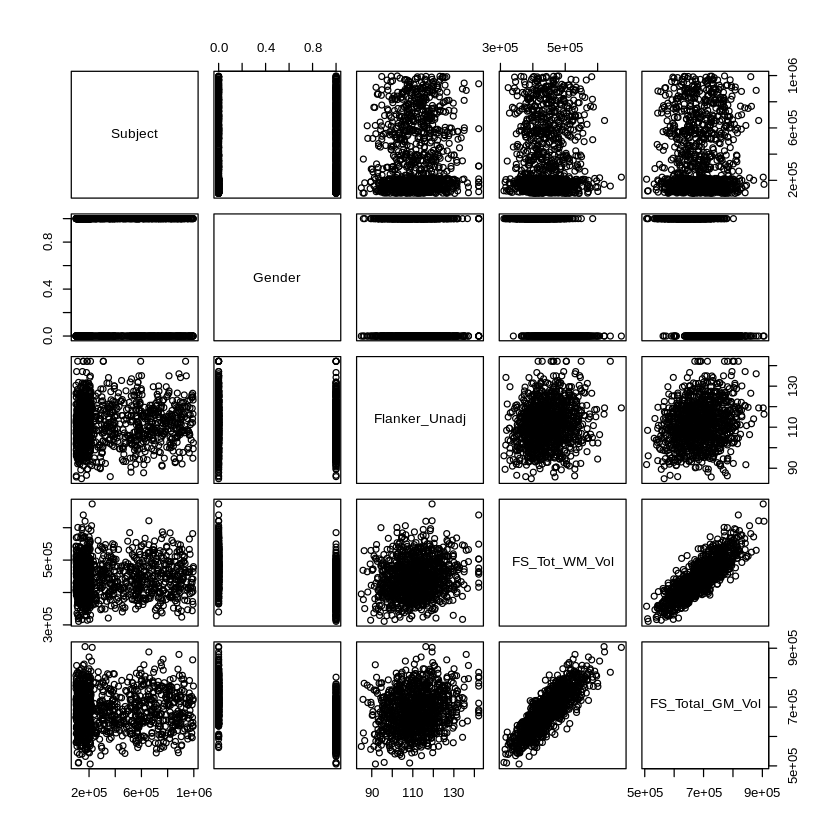

In [ ]:
pairs(d1)

> The total white matter and total grey matter appear positively and strongly correlated with each other. The correlations of the flanker task performance with the white matter and grey matter volume do not have obvious structure, they both appear uncorrelated to flanker performance. Because we can only correlate two quantitative variables, we can ignore the combinations that involve categorical variables such as subject and gender. 

---
## Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [ ]:
d1.lm = d1 %>% 
            lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = .)

d1.summ = summary(d1.lm)
d1.cnfi = confint(d1.lm)

d1.summ
d1.cnfi


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> According to the linear model fit, total grey matter volume is significantly associated with performance on the Flanker task (p = 3.18e-12). This means that, for every one unit increase in grey matter volume, there is an estimated 3.110e-05 unit increase in performance on the Flanker task. We can have 95% confidence that the true population value of this estimated increase is between 2.24e-05 and 3.98e-05.


---
## Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regression line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



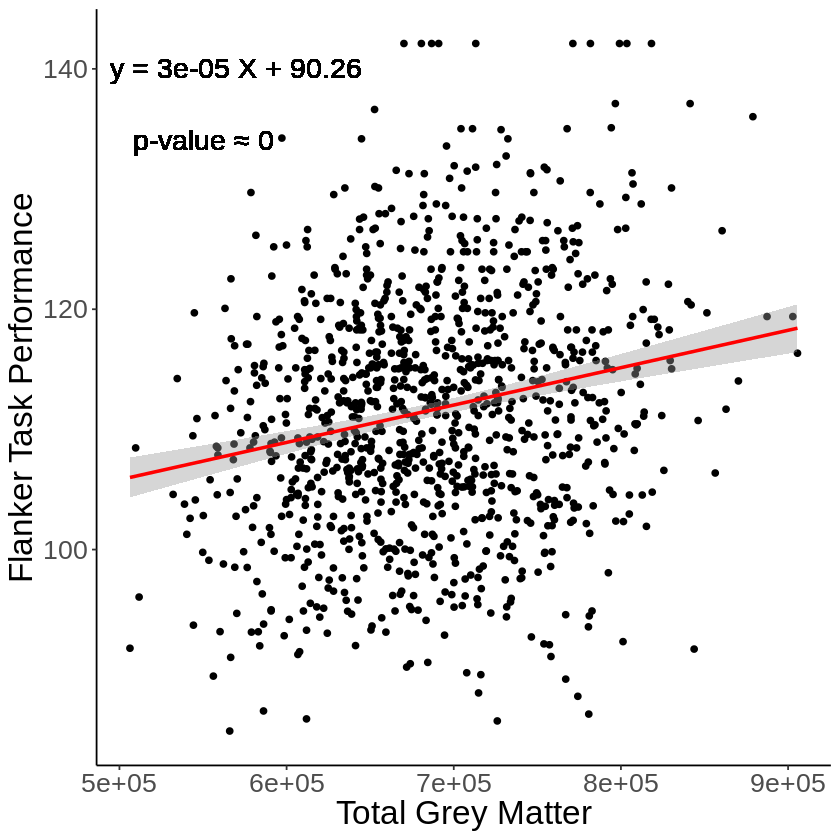

In [ ]:
details = tidy(d1.summ)

R_sqd <- d1.summ$r.squared %>% round(digits = 2)
b0_hat <- details$estimate[1] %>% round(digits = 2)
b1_hat <- details$estimate[2] %>% round(digits = 5)
p_val <- details$p.value[2] %>% round(digits = 2)

formula_txt = paste0('y = ', b1_hat, ' X', ' + ', b0_hat)
# rsq_txt = paste0("R^2 = ", R_sqd)
pval_txt = paste0('p-value ≈ ', p_val)

p <- ggplot(d1, 
            aes(x = FS_Total_GM_Vol, 
                y = Flanker_Unadj)) + 
            xlab("Total Grey Matter") + 
            ylab("Flanker Task Performance") +
            geom_point() + 
            stat_smooth(method = "lm", 
                        col = "red",
                        se = TRUE, 
                        level = 0.95) + 
            geom_text(x=5.7e+05, y=140, label=formula_txt, size=6) +
            geom_text(x=5.5e+05, y=134, label=pval_txt, size=6)

p +  scale_color_grey() + 
     theme_classic() +
     theme(text = element_text(size=20))

> In general, there appears to be a positive relationship between the total grey matter and flanker task performance. In other words, as total grey matter increases, the flanker task performance increases on average. However, the raw values show substantial individual variability in flanker task performance. Despite this, likely in part because of a large sample size, the linear regression estimate of the slope between total grey matter is shown to be positive and significant.

---

## Reflection (1 pt)

What do you conclude based on the analyses above?

> As the total grey matter increases by one unit, performance on the Flanker task is estimated to increase by 3.110e-05. Thus, we can conclude that there is a weak, positive correlation or relationship between total grey matter and performance on the Flanker task.

**DUE:** 5pm EST, March 11, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Urszula Oszczapinska

> Austin Luor